<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/hassan-ademola/Hamoye_capstone_project_smote/blob/main/Deep%20learning/efficientnetb7_0.998/efficientnetb7_0.998.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
# necessary imports
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

# for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
# define file paths
! git clone https://github.com/Daveadj/Hamoye_capstone_project_smote.git
train_path = 'Hamoye_capstone_project_smote/Data/train/'
val_path = 'Hamoye_capstone_project_smote/Data/val/'
test_path = 'Hamoye_capstone_project_smote/Data/test/'

Cloning into 'Hamoye_capstone_project_smote'...
remote: Enumerating objects: 10799, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 10799 (delta 7), reused 29 (delta 6), pack-reused 10768
Receiving objects: 100% (10799/10799), 359.96 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (10809/10809), done.


In [3]:
# generate train and test sets from directories
train_ds = image_dataset_from_directory(train_path,label_mode='categorical',
                                        image_size=(224, 224))
val_ds = image_dataset_from_directory(val_path,label_mode='categorical',
                                      image_size=(224, 224))
test_ds = image_dataset_from_directory(test_path,label_mode='categorical',
                                       shuffle=False,image_size=(224, 224))

Found 7556 files belonging to 4 classes.
Found 2160 files belonging to 4 classes.
Found 1084 files belonging to 4 classes.


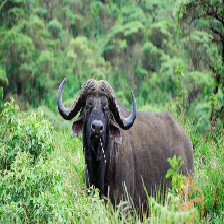

In [6]:
# load a sample image
from tensorflow.keras.preprocessing import image

img_path = train_path+'Buffalo/Buffalo_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [7]:
# make prediction with a pretrained model
from keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.efficientnet import decode_predictions

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

base_model = EfficientNetB0(weights='imagenet')
pred = base_model.predict(x)
print('Predicted:', decode_predictions(pred))

49152/35363 [=========================================] - 0s 0us/step
Predicted: [[('n02408429', 'water_buffalo', 0.8191309), ('n02403003', 'ox', 0.026929067), ('n02410509', 'bison', 0.023031784), ('n02412080', 'ram', 0.016642487), ('n02415577', 'bighorn', 0.0069873403)]]


In [8]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = EfficientNetB0(weights='imagenet', include_top=False,
                            input_shape=(224,224,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)

16719872/16705208 [==============================] - 1s 0us/step


In [9]:
# create callback to use during training
checkpoint = tf.keras.callbacks.ModelCheckpoint('weights.h5',save_best_only=True,
                                                    save_weights_only=True)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# train the model on the new data for a few epochs
history = model.fit(train_ds,epochs=20,validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/20
237/237 [==============================] - 490s 2s/step - loss: 0.2208 - accuracy: 0.9411 - val_loss: 0.0626 - val_accuracy: 0.9861
Epoch 2/20
237/237 [==============================] - 475s 2s/step - loss: 0.0522 - accuracy: 0.9899 - val_loss: 0.0398 - val_accuracy: 0.9903
Epoch 3/20
237/237 [==============================] - 474s 2s/step - loss: 0.0349 - accuracy: 0.9922 - val_loss: 0.0318 - val_accuracy: 0.9912
Epoch 4/20
237/237 [==============================] - 471s 2s/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.0270 - val_accuracy: 0.9921
Epoch 5/20
237/237 [==============================] - 479s 2s/step - loss: 0.0223 - accuracy: 0.9950 - val_loss: 0.0248 - val_accuracy: 0.9917
Epoch 6/20
237/237 [==============================] - 474s 2s/step - loss: 0.0199 - accuracy: 0.9950 - val_loss: 0.0234 - val_accuracy: 0.9935
Epoch 7/20
237/237 [==============================] - 476s 2s/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 0.0222 - val_accuracy: 0.9926

In [10]:
# save results
results = history.history

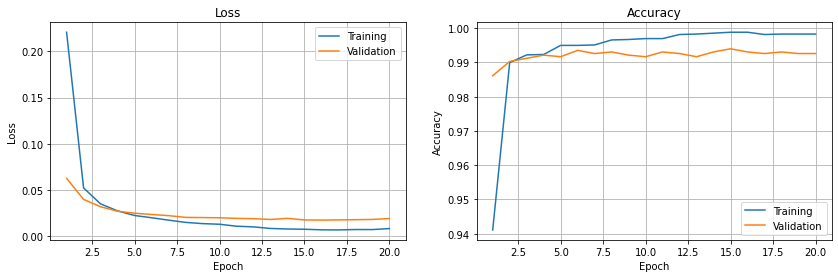

In [11]:
# plot results
import matplotlib.pyplot as plt
n_epochs = len(results['loss'])

plt.figure(figsize=[14,4])
plt.grid(True)
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), results['loss'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), results['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

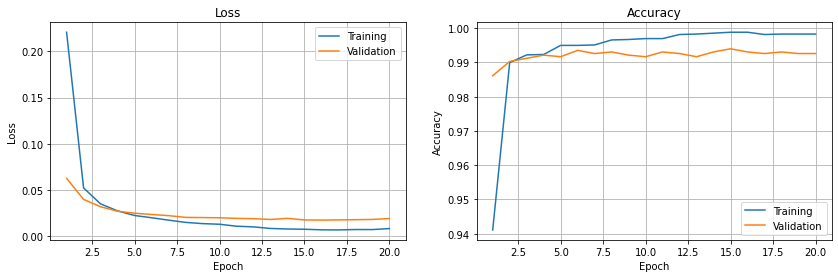

In [12]:
# plot results
import matplotlib.pyplot as plt
n_epochs = len(results['loss'])

plt.figure(figsize=[14,4])
plt.grid(True)
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), results['loss'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), results['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
model.load_weights('weights.h5')

In [14]:
predictions = model.evaluate(test_ds)

34/34 [==============================] - 50s 1s/step - loss: 0.0093 - accuracy: 0.9963


In [15]:
# make predictions on the unseen data
predictions = model.predict(test_ds)
predictions

array([[9.9948812e-01, 2.4963297e-06, 5.0417078e-04, 5.2664923e-06],
       [9.9999154e-01, 6.7380375e-07, 7.2341513e-06, 4.5217240e-07],
       [8.3318961e-01, 1.7347407e-05, 1.6666390e-01, 1.2911978e-04],
       ...,
       [2.2300205e-07, 1.1236060e-05, 9.0722165e-07, 9.9998760e-01],
       [1.2100102e-06, 2.1024550e-06, 5.2949423e-07, 9.9999619e-01],
       [1.1719092e-08, 5.1127892e-05, 1.7674642e-08, 9.9994886e-01]],
      dtype=float32)

In [16]:
# save the index of the highest probability
predictions = predictions.argmax(axis=1)
predictions

array([0, 0, 0, ..., 3, 3, 3])

In [17]:
# get the actual values
test_images = list(test_ds.unbatch().as_numpy_iterator())
y_true = np.array([i[1] for i in test_images])
y_true = y_true.argmax(axis=1)
y_true

array([0, 0, 0, ..., 3, 3, 3])

In [18]:
# calculate f1_score
from sklearn.metrics import f1_score
f1_score(y_true,predictions,average='macro')

0.996308201206148

In [19]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,predictions)

array([[271,   0,   0,   0],
       [  1, 270,   0,   0],
       [  1,   2, 268,   0],
       [  0,   0,   0, 271]])

In [20]:
import pandas as pd
comparison = pd.DataFrame({'actual':y_true,'predicted':predictions,
                           'same':y_true==predictions})
comparison.replace({0:'Buffalo',1:'Elephant',2:'Rhino',3:'Zebra'},inplace=True)
comparison[comparison.same==False]

,actual,predicted,same
287,Elephant,Buffalo,False
577,Rhino,Elephant,False
693,Rhino,Elephant,False
749,Rhino,Buffalo,False


In [22]:
# uncomment the below to save the model
import pickle
pickle.dump(model, open('efficientnetb0.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://18bd9b91-6ae1-4a97-9309-039b0b070f0a/assets
